# Final Project Heart Attack Classification by PatternSeeker

## Import Library

In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression # langsung pilih satu algoritma klasifikasi saja
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, precision_score, f1_score, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Import Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Pattern-Seeker/heart-attack-classification/refs/heads/main/heart_attack_prediction_dataset.csv')
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


## 1.&nbsp;EDA

In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [6]:
df['Sex'].value_counts()  # imbalanced dataset, ada kelas mayoritas (Sex = Male), ada kelas minoritas (Sex = Female)

Sex
Male      6111
Female    2652
Name: count, dtype: int64

In [7]:
df['Sex'].value_counts(normalize=True)*100

Sex
Male      69.736392
Female    30.263608
Name: proportion, dtype: float64

In [8]:
df['Family History'].value_counts()

Family History
0    4443
1    4320
Name: count, dtype: int64

In [9]:
df['Smoking'].value_counts() # imbalanced dataset, ada kelas mayoritas (Smoking = 1), ada kelas minoritas (Smoking = 0)

Smoking
1    7859
0     904
Name: count, dtype: int64

In [10]:
df['Smoking'].value_counts(normalize=True)*100

Smoking
1    89.683898
0    10.316102
Name: proportion, dtype: float64

In [11]:
df['Diabetes'].value_counts()

Diabetes
1    5716
0    3047
Name: count, dtype: int64

In [12]:
df['Diabetes'].value_counts(normalize=True)*100

Diabetes
1    65.228803
0    34.771197
Name: proportion, dtype: float64

In [13]:
df['Obesity'].value_counts()

Obesity
1    4394
0    4369
Name: count, dtype: int64

In [14]:
df['Diet'].value_counts()

Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

In [15]:
df['Stress Level'].value_counts()

Stress Level
2     913
4     910
7     903
9     887
8     879
3     868
1     865
5     860
6     855
10    823
Name: count, dtype: int64

In [16]:
df['Country'].value_counts()

Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dtype: int64

In [17]:
df['Continent'].value_counts()

Continent
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: count, dtype: int64

In [18]:
df['Hemisphere'].value_counts()

Hemisphere
Northern Hemisphere    5660
Southern Hemisphere    3103
Name: count, dtype: int64

In [19]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [20]:
df['Heart Attack Risk'].value_counts(normalize=True)*100

Heart Attack Risk
0    64.178934
1    35.821066
Name: proportion, dtype: float64

In [21]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


**Cek Distribusi Data**

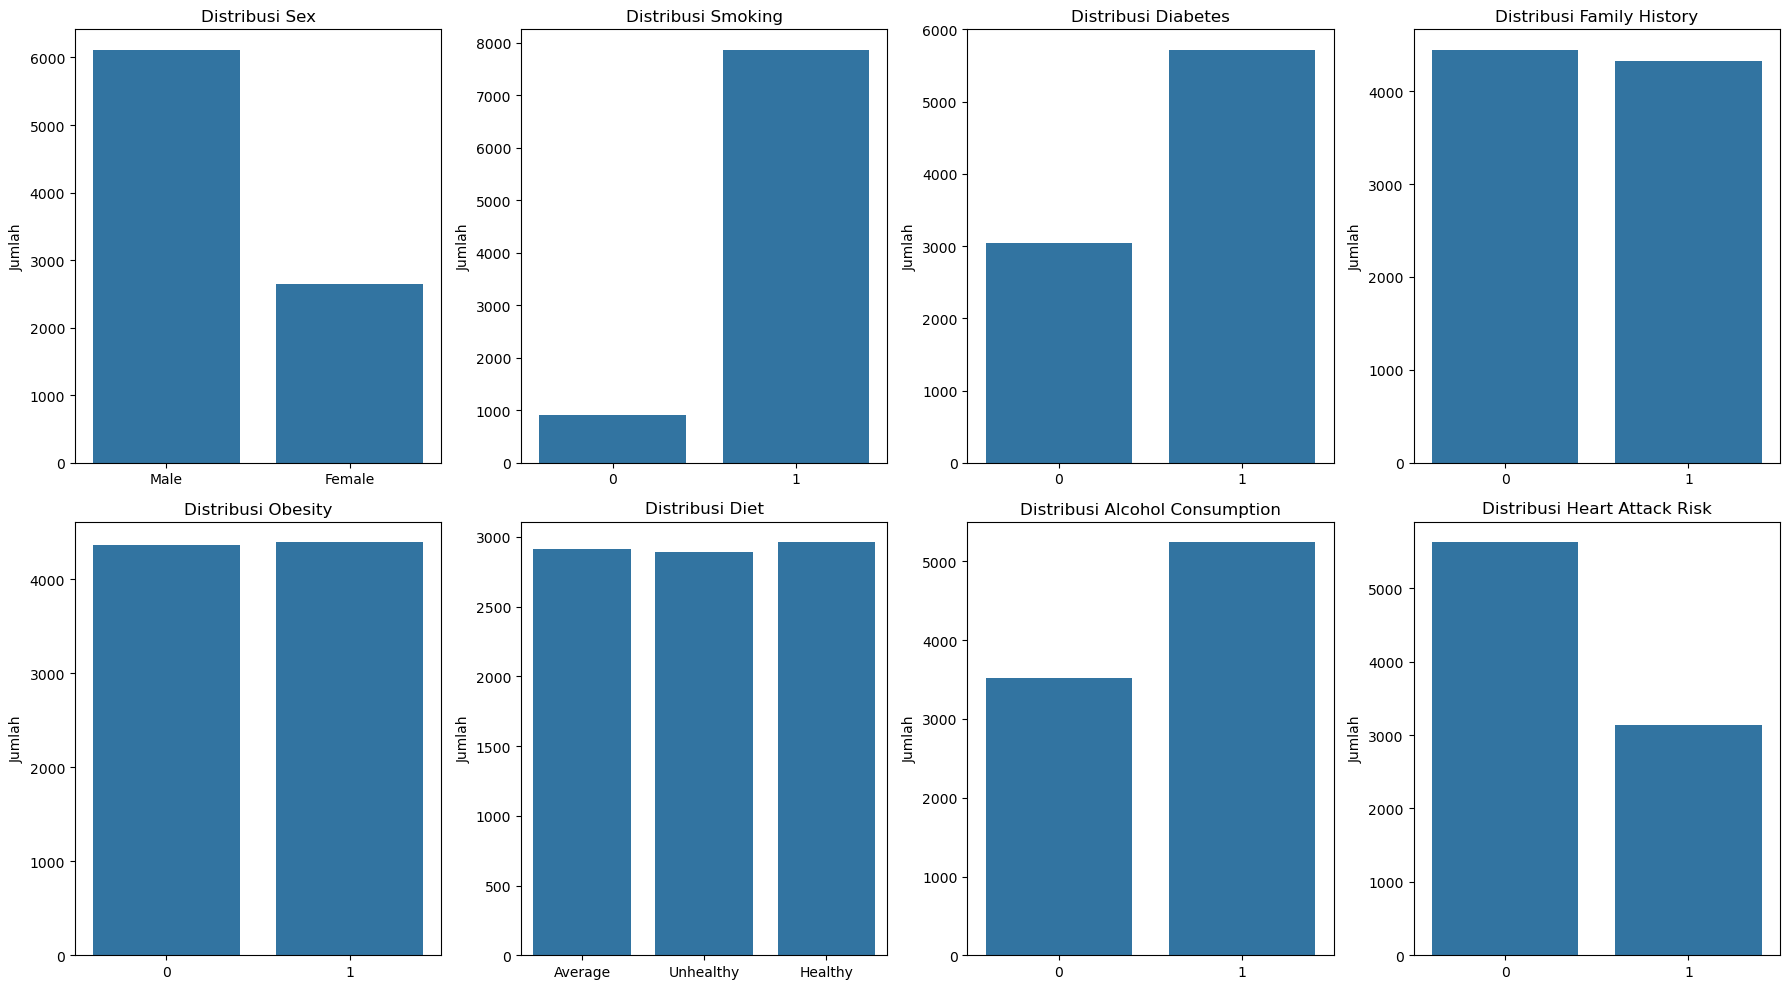

In [22]:
cat = ['Sex', 'Smoking', 'Diabetes', 'Family History', 'Obesity', 'Diet', 'Alcohol Consumption', 'Heart Attack Risk']

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 10))

axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

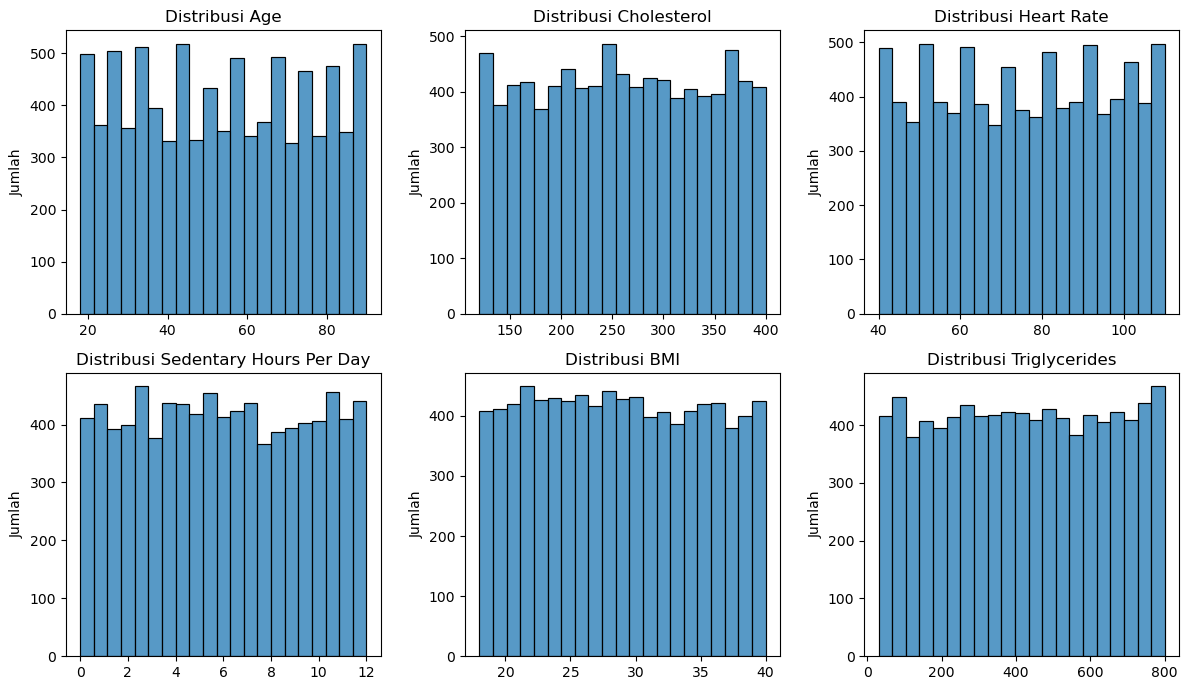

In [23]:
num_feature = df[['Age','Cholesterol', 'Heart Rate', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides']]

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 7))

axes = axes.flatten()

for i, col in enumerate(num_feature):
   sns.histplot(df[col], ax = axes[i])
   axes[i].set_title(f'Distribusi {col}', fontsize=12)
   axes[i].set_xlabel('')
   axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

**Cek Outlier**

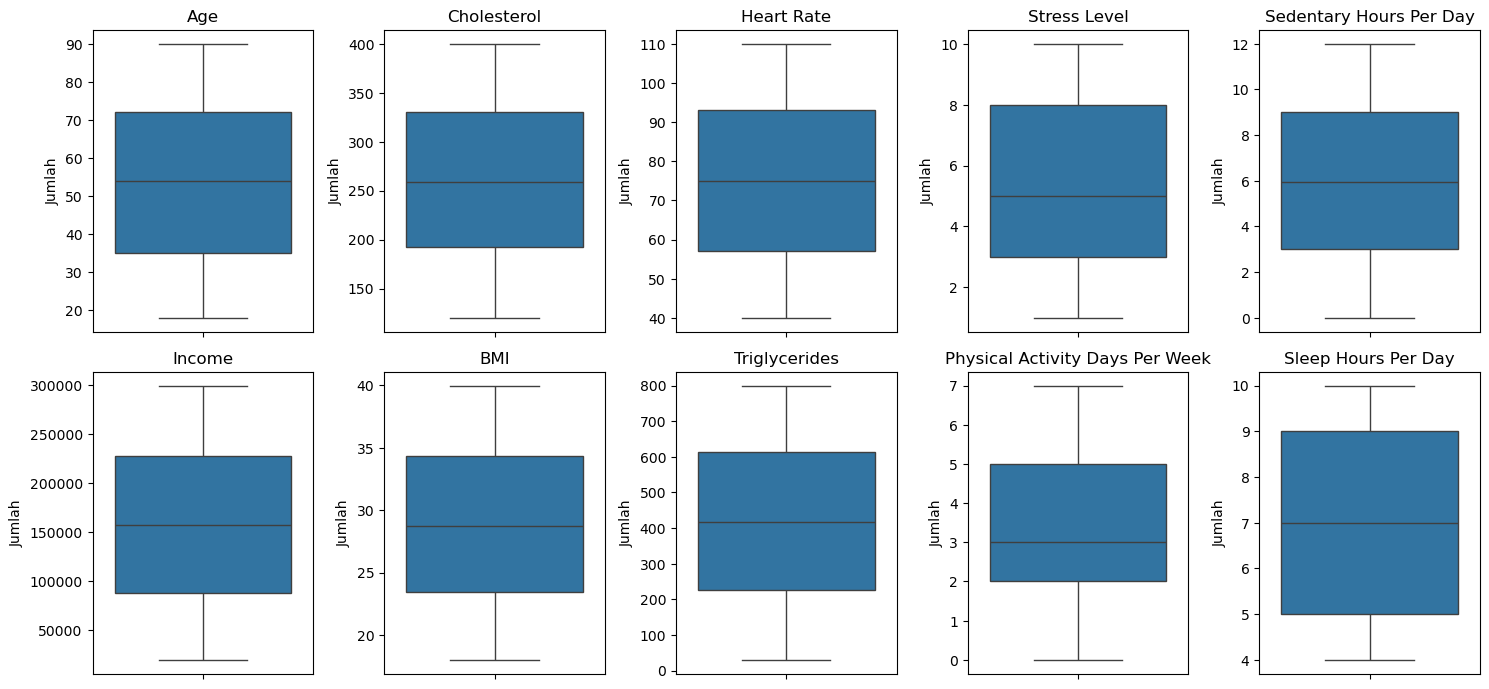

In [24]:
num_feature2 = df[['Age',
 'Cholesterol',
 'Heart Rate',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',]]

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 7))

axes = axes.flatten()

for i, col in enumerate(num_feature2):
   sns.boxplot(df[col], ax = axes[i])
   axes[i].set_title(f'{col}', fontsize=12)
   axes[i].set_xlabel('')
   axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

**Membuat Heatmap Korelasi**

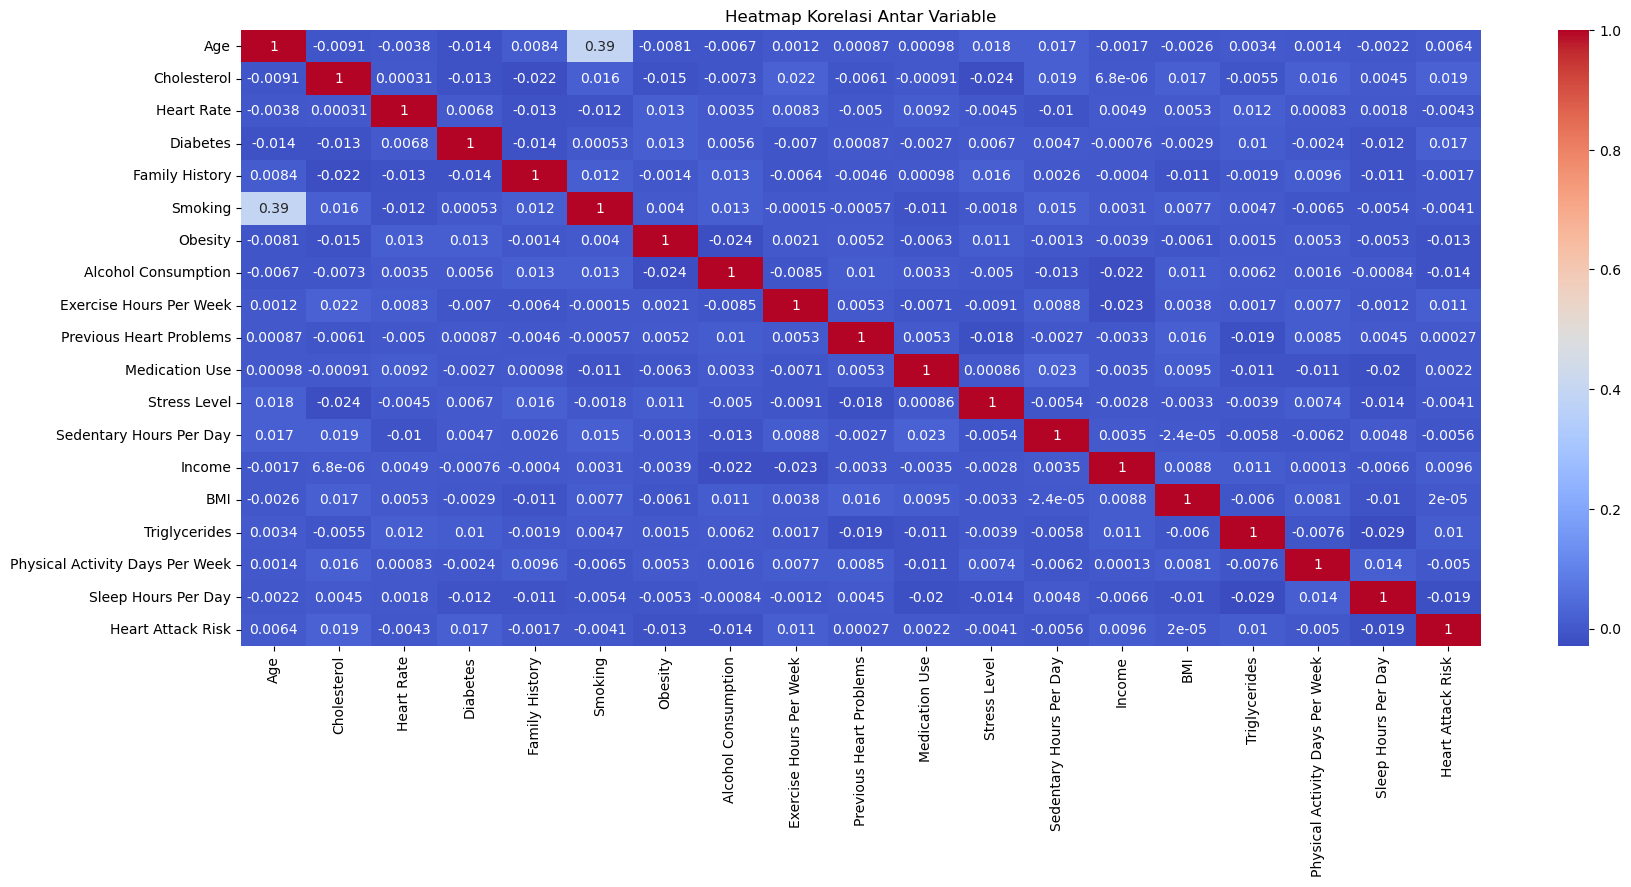

In [25]:
corr = df.select_dtypes(include = 'number').corr()

plt.figure(figsize = (20, 8))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variable')
plt.show()



> **Hubungan linear antar variabel sangat lemah.**



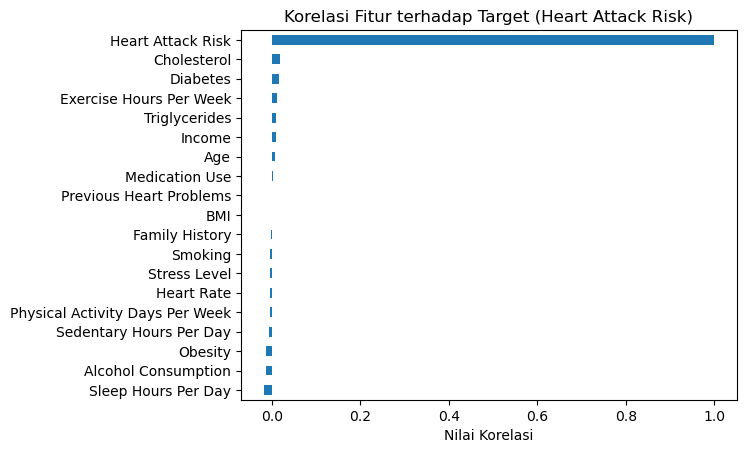

In [26]:
corr_target = corr['Heart Attack Risk'].sort_values(ascending=True)
# Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')
corr_target.plot(kind='barh')
plt.title("Korelasi Fitur terhadap Target (Heart Attack Risk)")
plt.xlabel("Nilai Korelasi")
plt.show()



> **Korelasi masing-masing fitur terhadap target (Heart Attack Risk) menunjukkan bahwa tidak ada fitur dengan hubungan linear yang kuat terhadap target.**



**Membandingkan distribusi setiap fitur numerik terhadap variabel target**

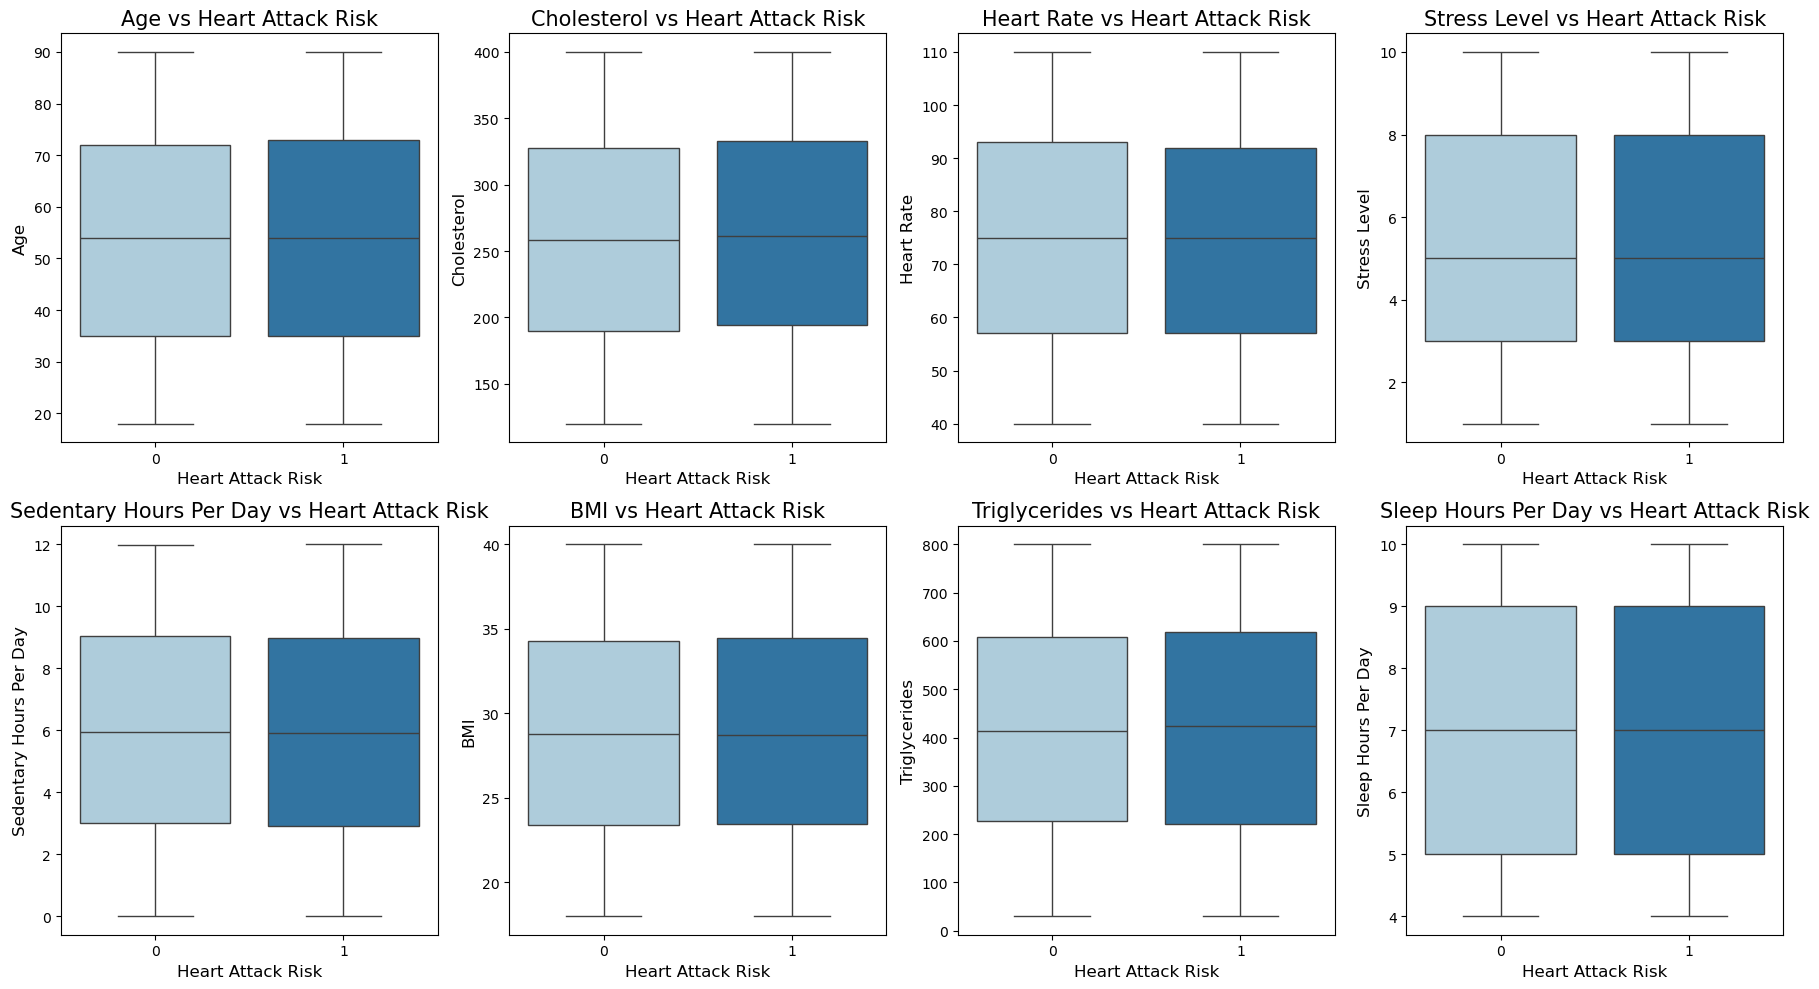

In [27]:
features = ['Age', 'Cholesterol', 'Heart Rate', 'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Sleep Hours Per Day']

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 10))

axes = axes.flatten()

for i, col in enumerate(features):
   sns.boxplot(ax = axes[i], x = 'Heart Attack Risk', y =col, data=df, palette='Paired')
   axes[i].set_title(f'{col} vs Heart Attack Risk', fontsize=15)
   axes[i].set_xlabel('Heart Attack Risk', fontsize=12)
   axes[i].set_ylabel(f'{col}', fontsize=12)

plt.tight_layout()
plt.show()



> **Hubungan fitur numerik terhadap Heart Attack Risk menunjukkan bahwa distribusi tiap fitur pada kelas risiko 0 dan 1 relatif serupa.**



## 2.&nbsp;Preprocessing

In [28]:
df_copy = df.copy()

In [29]:
columns_cat = df_copy.select_dtypes(include = ['object']).columns.to_list()
columns_cat

['Patient ID',
 'Sex',
 'Blood Pressure',
 'Diet',
 'Country',
 'Continent',
 'Hemisphere']

### 2.1.&nbsp;Feature Engineering

**Melakukan sedikit *Feature Engineering* dengan mengubah Blood Pressure dengan menjadikannya 2 fitur numerik, dan kemudian hapus kolom Blood Pressure**

In [30]:
df_copy['Blood Pressure'].head()

0     158/88
1     165/93
2     174/99
3    163/100
4      91/88
Name: Blood Pressure, dtype: object

In [31]:
df_copy[['BP-Systolic','BP_Diastolic']] = (df_copy['Blood Pressure'].str.split('/', expand = True)).astype(int)
df_copy.drop(columns = ['Blood Pressure'], inplace = True)

In [32]:
df_copy['BP-Systolic'].head()

0    158
1    165
2    174
3    163
4     91
Name: BP-Systolic, dtype: int64

In [33]:
df_copy['BP_Diastolic'].head()

0     88
1     93
2     99
3    100
4     88
Name: BP_Diastolic, dtype: int64

In [34]:
columns_cat2 = df_copy.select_dtypes(include = ['object']).columns.to_list()
columns_cat2

['Patient ID', 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']

In [35]:
columns_num = df_copy.select_dtypes(include = ['number']).columns.to_list()
columns_num

['Age',
 'Cholesterol',
 'Heart Rate',
 'Diabetes',
 'Family History',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Exercise Hours Per Week',
 'Previous Heart Problems',
 'Medication Use',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'Heart Attack Risk',
 'BP-Systolic',
 'BP_Diastolic']

### 2.2.&nbsp;Encode Categorical Data (Label Encoding/One-Hot Encoding)

In [36]:
df_encoded = pd.get_dummies(df_copy, columns=columns_cat2, drop_first=True)
df_encoded.to_pickle('df_encoded.pkl')

### 2.3.&nbsp;Feature Selection

In [86]:
X = df_copy.drop(columns = ['Patient ID', 'Sex', 'Diet', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk'])
y = df_copy['Heart Attack Risk']

In [87]:
X = X.reset_index(drop = True) # untuk mengurutkan kembali indeksnya
y = y.reset_index(drop = True)

### 2.4.&nbsp;Split Dataset

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32, stratify=y)

## 4.&nbsp;Model Selection

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


In [90]:
try:
    from xgboost import XGBClassifier
    xgb_available = True
except Exception:
    XGBClassifier = None
    xgb_available = False
    print("Warning: xgboost tidak terpasang. Untuk memakai XGBoost jalankan: pip install xgboost")

# Definisikan model (scaling untuk algoritma yang sensitif)
models = {
    'LogisticRegression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))]),
    'RandomForest': Pipeline([('clf', RandomForestClassifier(random_state=32))]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True, random_state=32))]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])
}
if xgb_available:
    models['XGBoost'] = Pipeline([('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=32))])

# Training dan evaluasi
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    except Exception:
        roc = None

    print(f"--- {name} ---")
    print(cr)
    print('Accuracy:', acc)
    if roc is not None:
        print('ROC AUC:', roc)
    print('Confusion Matrix:\n', cm)
    print('\n')

    # simpan model individual
    pickle.dump(model, open(f'model_{name}.pkl', 'wb'))

    results.append({'name': name, 'model': model, 'accuracy': acc, 'roc_auc': roc})

# Ringkasan
summary_df = pd.DataFrame(results)[['name','accuracy','roc_auc']].sort_values(by='accuracy', ascending=False).reset_index(drop=True)
print('Ringkasan performa:')
display(summary_df)

# Simpan model terbaik (berdasarkan accuracy)
best = max(results, key=lambda x: x['accuracy'])
print('Best model:', best['name'], 'accuracy:', best['accuracy'])
pickle.dump(best['model'], open('model_best.pkl', 'wb'))

--- LogisticRegression ---
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1687
           1       0.00      0.00      0.00       942

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629

Accuracy: 0.6416888550779765
ROC AUC: 0.5052115779842608
Confusion Matrix:
 [[1687    0]
 [ 942    0]]


--- RandomForest ---
              precision    recall  f1-score   support

           0       0.64      0.98      0.77      1687
           1       0.35      0.02      0.04       942

    accuracy                           0.63      2629
   macro avg       0.50      0.50      0.41      2629
weighted avg       0.54      0.63      0.51      2629

Accuracy: 0.6348421453023964
ROC AUC: 0.49856118412690026
Confusion Matrix:
 [[1647   40]
 [ 920   22]]


--- SVM ---
              precision    recall  f1-score   support

           0       0

,name,accuracy,roc_auc
0,LogisticRegression,0.641689,0.505212
1,SVM,0.640928,0.518117
2,RandomForest,0.634842,0.498561
3,XGBoost,0.599087,0.514932
4,KNN,0.569038,0.497325


Best model: LogisticRegression accuracy: 0.6416888550779765


## 5.&nbsp;Handling Imbalance Data (SMOTE)

In [91]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import roc_curve, roc_auc_score

In [92]:
models_smote = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=32)),
        ('model', LogisticRegression(random_state=32))
    ]),

    "Random Forest": Pipeline([
        ('smote', SMOTE(random_state=32)),
        ('model', RandomForestClassifier(random_state=32))
    ]),

    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=32)),
        ('model', SVC(probability=True, random_state=32))
    ]),

    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=32)),
        ('model', KNeighborsClassifier(n_neighbors=5, weights='distance'))
    ])
}

if xgb_available:
  models_smote["XGBoost"] = Pipeline([
    ('smote', SMOTE(random_state=32)),
    ('model', XGBClassifier(
        random_state=32,
        eval_metric='logloss'
    ))
])

In [93]:
def smote_cross_validate_models(X, y, model_dict):

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {
        "accuracy": "accuracy",
        "precision": "precision",
        "recall": "recall",
        "f1": "f1",
        "roc_auc": "roc_auc"
    }

    results = []

    for name, model in model_dict.items():

        scores = cross_validate(
            model,
            X,
            y,
            cv=cv,
            scoring=scoring,
            return_train_score=True,
            n_jobs=-1
        )

        results.append({
            "Model": name,
            "Accuracy": np.mean(scores["test_accuracy"]),
            "ROC_AUC_mean": np.mean(scores["test_roc_auc"]),
            "Recall_mean": np.mean(scores["test_recall"]),
            "ROC_AUC_train": np.mean(scores["train_roc_auc"]),
            "Overfit_gap": np.mean(scores["train_roc_auc"]) - np.mean(scores["test_roc_auc"])
        })

    return pd.DataFrame(results).sort_values(by="ROC_AUC_mean", ascending=False)

In [94]:
my_cv = smote_cross_validate_models(X_train,y_train, models_smote)
my_cv

,Model,Accuracy,ROC_AUC_mean,Recall_mean,ROC_AUC_train,Overfit_gap
4,XGBoost,0.553798,0.506199,0.342733,0.999419,0.493220
3,KNN,0.495276,0.505484,0.553485,1.000000,0.494516
1,Random Forest,0.579720,0.498254,0.223940,1.000000,0.501746
2,SVM,0.535212,0.492696,0.350473,0.804672,0.311976
0,Logistic Regression,0.489890,0.485878,0.474277,0.528950,0.043071


In [95]:
best_model_name = my_cv.iloc[0]["Model"]
best_model = models_smote[best_model_name]

smote = best_model.named_steps['smote']

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape)
print(y_train_resampled.value_counts())

(7874, 20)
Heart Attack Risk
0    3937
1    3937
Name: count, dtype: int64


In [96]:
my_cv_resampled = smote_cross_validate_models(X_train_resampled, y_train_resampled, models_smote)
my_cv_resampled

,Model,Accuracy,ROC_AUC_mean,Recall_mean,ROC_AUC_train,Overfit_gap
1,Random Forest,0.679198,0.729301,0.593851,1.000000,0.270699
4,XGBoost,0.650495,0.703754,0.635512,0.999511,0.295757
3,KNN,0.616206,0.696832,0.762514,1.000000,0.303168
2,SVM,0.652782,0.693808,0.569470,0.848370,0.154561
0,Logistic Regression,0.598804,0.640338,0.595377,0.647019,0.006681


In [101]:
Xx = X.to_numpy()
yy = y.to_numpy()

In [ ]:
results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

for name, model in models_smote.items():
    roc_auc_scores = []
    acc_scores = []
    recall_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = Xx[train_idx], Xx[test_idx]
        y_train, y_test = yy[train_idx], yy[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        acc_scores.append(acc)
        recall_scores.append(recall)

        try:
            y_proba = model.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_proba)
            roc_auc_scores.append(roc)
        except Exception:
            roc = None

    pickle.dump(model, open(f'tuned_rocauc_model_{name}.pkl', 'wb'))      
    results.append({'name': name, 'model': model, 'accuracy': np.mean(acc_scores), 'roc_auc': np.mean(roc_auc_scores) if roc_auc_scores else None, 'recall': np.mean(recall_scores)})
        
# Ringkasan
summary_df = pd.DataFrame(results)[['name','accuracy','roc_auc', 'recall']].sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
print('Ringkasan performa:')
display(summary_df)

# Simpan model terbaik (berdasarkan roc_auc)
best = max(results, key=lambda x: x['roc_auc'])
print('Best model:', best['name'], 'roc_auc:', best['roc_auc'])
pickle.dump(best['model'], open('model_best_rocauc.pkl', 'wb'))


Ringkasan performa:


,name,accuracy,roc_auc,recall
0,XGBoost,0.369740,0.502487,0.948408
1,KNN,0.613140,0.500615,0.109050
2,SVM,0.641789,0.500000,0.000000
3,Logistic Regression,0.414913,0.498327,0.800000
4,Random Forest,0.488986,0.497610,0.539869


Best model: XGBoost roc_auc: 0.5024870242428154


## 6.&nbsp;Model Tuning

### ROC AUC

In [105]:
models_smote = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=32)),
        ('model', LogisticRegression(random_state=32))
    ]),

    "Random Forest": Pipeline([
        ('smote', SMOTE(random_state=32)),
        ('model', RandomForestClassifier(random_state=32))
    ]),

    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=32)),
        ('model', SVC(probability=True, random_state=32))
    ]),

    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=32)),
        ('model', KNeighborsClassifier(n_neighbors=5, weights='distance'))
    ])
}

if xgb_available:
  models_smote["XGBoost"] = Pipeline([
    ('smote', SMOTE(random_state=32)),
    ('model', XGBClassifier(
        random_state=32,
        eval_metric='logloss'
    ))
])

In [106]:
# Hyperparameter tuning ROC AUC

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'model__C': [0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear', 'saga'],
        'model__penalty': ['l1', 'l2', 'elasticnet']
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, 20, None],
        'model__min_samples_split': [2, 5],
        'model__max_features': ['sqrt', 'log2', None]
    },
    'SVM': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    }
}

if xgb_available:
    param_grids['XGBoost'] = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__subsample': [0.8, 1.0]
    }

# GridSearchCV for each model
best_models = {}
best_model_scores = {}
for name, model in models_smote.items():
    print(f"\n🔍 Tuning {name}...")
    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_models[name] = grid_search.best_estimator_
    best_model_scores[name] = grid_search.best_score_
    print(f"✅ Best params: {grid_search.best_params_}")
    print(f"   Best CV score: {grid_search.best_score_:.4f}")


🔍 Tuning Logistic Regression...
✅ Best params: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'saga'}
   Best CV score: 0.6411

🔍 Tuning Random Forest...
✅ Best params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_split': 2, 'model__n_estimators': 200}
   Best CV score: 0.7335

🔍 Tuning SVM...
✅ Best params: {'model__C': 1, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
   Best CV score: 0.6907

🔍 Tuning KNN...
✅ Best params: {'model__n_neighbors': 5, 'model__weights': 'distance'}
   Best CV score: 0.6995

🔍 Tuning XGBoost...
✅ Best params: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}
   Best CV score: 0.7165


In [107]:
my_cv = smote_cross_validate_models(X_train_resampled, y_train_resampled, best_models)
my_cv

,Model,Accuracy,ROC_AUC_mean,Recall_mean,ROC_AUC_train,Overfit_gap
1,Random Forest,0.682879,0.729703,0.591823,1.000000,0.270297
4,XGBoost,0.663958,0.719350,0.636019,0.995619,0.276270
3,KNN,0.616206,0.696832,0.762514,1.000000,0.303168
2,SVM,0.652782,0.693806,0.569470,0.848370,0.154563
0,Logistic Regression,0.598423,0.640574,0.594871,0.646952,0.006378


In [108]:
results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

for name, model in best_models.items():
    roc_auc_scores = []
    acc_scores = []
    recall_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = Xx[train_idx], Xx[test_idx]
        y_train, y_test = yy[train_idx], yy[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        acc_scores.append(acc)
        recall_scores.append(recall)

        try:
            y_proba = model.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_proba)
            roc_auc_scores.append(roc)
        except Exception:
            roc = None

    pickle.dump(model, open(f'tuned_rocauc_model_{name}.pkl', 'wb'))      
    results.append({'name': name, 'model': model, 'accuracy': np.mean(acc_scores), 'roc_auc': np.mean(roc_auc_scores) if roc_auc_scores else None, 'recall': np.mean(recall_scores)})
        
# Ringkasan
summary_df = pd.DataFrame(results)[['name','accuracy','roc_auc', 'recall']].sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
print('Ringkasan performa:')
display(summary_df)

# Simpan model terbaik (berdasarkan roc_auc)
best = max(results, key=lambda x: x['roc_auc'])
print('Best model:', best['name'], 'roc_auc:', best['roc_auc'])
print(f"ROC_train - ROC_test: {best_model_scores[best['name']] * 100 - best['roc_auc'] * 100} %")
pickle.dump(best['model'], open('model_best_rocauc.pkl', 'wb'))


Ringkasan performa:


,name,accuracy,roc_auc,recall
0,XGBoost,0.620450,0.510735,0.107044
1,Random Forest,0.630606,0.499914,0.032493
2,Logistic Regression,0.498458,0.497856,0.488372
3,SVM,0.530073,0.497417,0.373058
4,KNN,0.486479,0.492219,0.525333


Best model: XGBoost roc_auc: 0.510734826926295
ROC_train - ROC_test: 20.576063444030147 %


In [111]:
results = []
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    except Exception:
        roc = None

    print(f"--- {name} ---")
    print(cr)
    print('Accuracy:', acc)
    print('Recall:', recall)
    if roc is not None:
        print('ROC AUC:', roc)
    print('Confusion Matrix:\n', cm)
    print('\n')

    # simpan model individual
    pickle.dump(model, open(f'tuned_rocauc_model_{name}.pkl', 'wb'))

    results.append({'name': name, 'model': model, 'accuracy': acc, 'roc_auc': roc, 'recall': recall})

# Ringkasan
summary_df = pd.DataFrame(results)[['name','accuracy','roc_auc', 'recall']].sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
print('Ringkasan performa:')
display(summary_df)

# Simpan model terbaik (berdasarkan roc_auc)
best = max(results, key=lambda x: x['roc_auc'])
print('Best model:', best['name'], 'roc_auc:', best['roc_auc'])
print(f"ROC_train - ROC_test: {best_model_scores[best['name']] * 100 - best['roc_auc'] * 100} %")
pickle.dump(best['model'], open('model_best_rocauc.pkl', 'wb'))

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.63      0.51      0.57      1124
           1       0.35      0.47      0.40       628

    accuracy                           0.50      1752
   macro avg       0.49      0.49      0.48      1752
weighted avg       0.53      0.50      0.51      1752

Accuracy: 0.4977168949771689
Recall: 0.4745222929936306
ROC AUC: 0.5032810481220391
Confusion Matrix:
 [[574 550]
 [330 298]]


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.64      0.96      0.77      1124
           1       0.40      0.04      0.08       628

    accuracy                           0.63      1752
   macro avg       0.52      0.50      0.43      1752
weighted avg       0.56      0.63      0.52      1752

Accuracy: 0.6335616438356164
Recall: 0.044585987261146494
ROC AUC: 0.503210922093524
Confusion Matrix:
 [[1082   42]
 [ 600   28]]


--- SVM ---
              precision

,name,accuracy,roc_auc,recall
0,XGBoost,0.631279,0.538122,0.111465
1,SVM,0.543950,0.510012,0.385350
2,Logistic Regression,0.497717,0.503281,0.474522
3,Random Forest,0.633562,0.503211,0.044586
4,KNN,0.482877,0.499287,0.533439


Best model: XGBoost roc_auc: 0.5381216424507559
ROC_train - ROC_test: 17.837381891584066 %


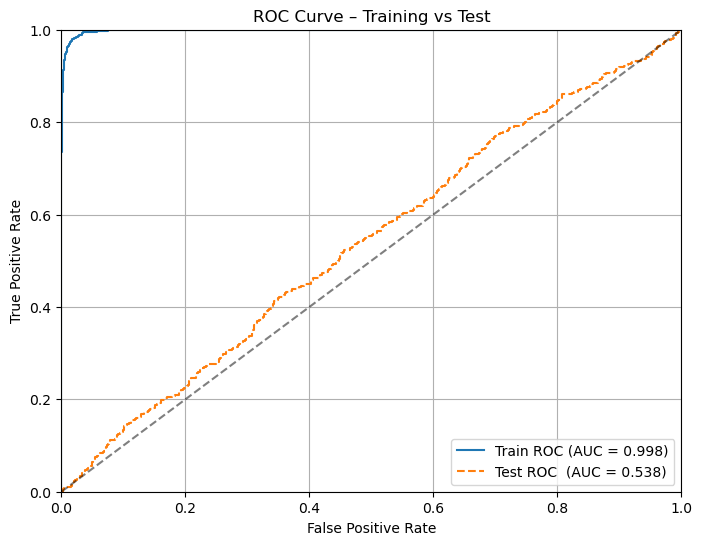

In [122]:
# gunakan model terbaik yang sudah tersimpan di variabel `best`
model = best['model']

# probabilitas prediksi
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba  = model.predict_proba(X_test)[:, 1]

# hitung ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test,  tpr_test,  _ = roc_curve(y_test,  y_test_proba)

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test  = auc(fpr_test,  tpr_test)

# plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.3f})')
plt.plot(fpr_test,  tpr_test,  label=f'Test ROC  (AUC = {roc_auc_test:.3f})',
         linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Training vs Test')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Recall

In [123]:
# Hyperparameter tuning ROC AUC

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'model__C': [0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear', 'saga'],
        'model__penalty': ['l1', 'l2', 'elasticnet']
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, 20, None],
        'model__min_samples_split': [2, 5],
        'model__max_features': ['sqrt', 'log2', None]
    },
    'SVM': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    }
}

if xgb_available:
    param_grids['XGBoost'] = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__subsample': [0.8, 1.0]
    }

# GridSearchCV for each model
best_models = {}
best_model_scores = {}
for name, model in models_smote.items():
    print(f"\n🔍 Tuning {name}...")
    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=5,
        scoring='recall',
        n_jobs=-1
    )
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_models[name] = grid_search.best_estimator_
    best_model_scores[name] = grid_search.best_score_
    print(f"✅ Best params: {grid_search.best_params_}")
    print(f"   Best CV score: {grid_search.best_score_:.4f}")


🔍 Tuning Logistic Regression...
✅ Best params: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
   Best CV score: 0.5903

🔍 Tuning Random Forest...
✅ Best params: {'model__max_depth': 20, 'model__max_features': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
   Best CV score: 0.6035

🔍 Tuning SVM...
✅ Best params: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
   Best CV score: 0.6616

🔍 Tuning KNN...
✅ Best params: {'model__n_neighbors': 3, 'model__weights': 'distance'}
   Best CV score: 0.7706

🔍 Tuning XGBoost...
✅ Best params: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}
   Best CV score: 0.6311


In [ ]:
results = []
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    except Exception:
        roc = None

    print(f"--- {name} ---")
    print(cr)
    print('Accuracy:', acc)
    print('Recall:', recall)
    if roc is not None:
        print('ROC AUC:', roc)
    print('Confusion Matrix:\n', cm)
    print('\n')

    # simpan model individual
    pickle.dump(model, open(f'tuned_recall_model_{name}.pkl', 'wb'))

    results.append({'name': name, 'model': model, 'accuracy': acc, 'roc_auc': roc, 'recall': recall})

# Ringkasan
summary_df = pd.DataFrame(results)[['name','accuracy','roc_auc', 'recall']].sort_values(by='recall', ascending=False).reset_index(drop=True)
print('Ringkasan performa:')
display(summary_df)

# Simpan model terbaik (berdasarkan recall)
best = max(results, key=lambda x: x['recall'])
print('Best model:', best['name'], 'recall:', best['recall'])
pickle.dump(best['model'], open('model_best_recall.pkl', 'wb'))

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.63      0.50      0.56      1124
           1       0.35      0.49      0.41       628

    accuracy                           0.49      1752
   macro avg       0.49      0.49      0.48      1752
weighted avg       0.53      0.49      0.50      1752

Accuracy: 0.4937214611872146
Recall: 0.4888535031847134
ROC AUC: 0.5032484643108098
Confusion Matrix:
 [[558 566]
 [321 307]]


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      1124
           1       0.43      0.07      0.11       628

    accuracy                           0.63      1752
   macro avg       0.54      0.51      0.44      1752
weighted avg       0.57      0.63      0.53      1752

Accuracy: 0.6341324200913242
Recall: 0.06528662420382166
ROC AUC: 0.5014322710066415
Confusion Matrix:
 [[1070   54]
 [ 587   41]]


--- SVM ---
              precision

,name,accuracy,roc_auc,recall
0,KNN,0.498288,0.503186,0.514331
1,Logistic Regression,0.493721,0.503248,0.488854
2,SVM,0.543379,0.516706,0.353503
3,XGBoost,0.590753,0.515023,0.157643
4,Random Forest,0.634132,0.501432,0.065287


Best model: KNN recall: 0.5143312101910829
Recall_train - Recall_test: 25.628457035445734 %


In [126]:
results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

for name, model in best_models.items():
    roc_auc_scores = []
    acc_scores = []
    recall_scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = Xx[train_idx], Xx[test_idx]
        y_train, y_test = yy[train_idx], yy[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        acc_scores.append(acc)
        recall_scores.append(recall)

        try:
            y_proba = model.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_proba)
            roc_auc_scores.append(roc)
        except Exception:
            roc = None

    pickle.dump(model, open(f'tuned_recall_model_{name}.pkl', 'wb'))      
    results.append({'name': name, 'model': model, 'accuracy': np.mean(acc_scores), 'roc_auc': np.mean(roc_auc_scores) if roc_auc_scores else None, 'recall': np.mean(recall_scores)})
        
# Ringkasan
summary_df = pd.DataFrame(results)[['name','accuracy','roc_auc', 'recall']].sort_values(by='recall', ascending=False).reset_index(drop=True)
print('Ringkasan performa:')
display(summary_df)

# Simpan model terbaik (berdasarkan recall)
best = max(results, key=lambda x: x['recall'])
print('Best model:', best['name'], 'recall:', best['recall'])
print(f"Recall_train - Recall_test: {best_model_scores[best['name']] * 100 - best['recall'] * 100} %")
pickle.dump(best['model'], open('model_best_recall.pkl', 'wb'))


Ringkasan performa:


,name,accuracy,roc_auc,recall
0,Logistic Regression,0.495720,0.497849,0.499523
1,KNN,0.488193,0.490622,0.483279
2,SVM,0.543423,0.507176,0.354572
3,XGBoost,0.601506,0.507950,0.170444
4,Random Forest,0.627412,0.496152,0.055434


Best model: Logistic Regression recall: 0.4995230548867826
Recall_train - Recall_test: 9.073423521441782 %


## 7.&nbsp;Model Deployment

In [ ]:
pickle.dump(model_logreg, open('model_logreg.pkl', 'wb'))

In [ ]:
!pip install Flask==3.0.0 pyngrok==7.1.2

In [ ]:
from pyngrok import ngrok
from flask import Flask, jsonify, request
from json import JSONEncoder

In [ ]:
ngrok_key = '' # gunakan token masing-masing dari ngrok. jangan gunakan token ini
port = 4999

### a.&nbsp;Deployment URL

In [ ]:
ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

### b.&nbsp;Setup API & Run

In [ ]:
# membuat API dan menjalankan web server sederhana dengan framework Flask

app = Flask(__name__)

# fungsi homepage, mengembalikan json
@app.route('/', methods = ['GET'])
def index(): # merepresentasikan satu page
  return {"pesan":"ini halaman homepage"}

@app.route('/predict', methods = ['GET'])
def predict():
  data = request.json
  df_new = pd.DataFrame(data, index = [0])

  # load encoder yg dipakai untuk pre-processing. JANGAN BUAT ENCODER BARU
  with open('/content/label_encoder_department.pkl', 'rb') as file:
    label_encoder_department = pickle.load(file)

  with open('/content/label_encoder_education.pkl', 'rb') as file:
    label_encoder_education = pickle.load(file)

  with open('/content/label_encoder_gender.pkl', 'rb') as file:
    label_encoder_gender = pickle.load(file)

  with open('/content/label_encoder_recruitment_channel.pkl', 'rb') as file:
    label_encoder_recruitment_channel = pickle.load(file)

  with open('/content/label_encoder_region.pkl', 'rb') as file:
    label_encoder_region = pickle.load(file)

  # encode data baru dengan encoder2 di atas
  df_new['department'] = label_encoder_department.transform(df_new['department']) # JANGAN pakai fungsi FIT_TRANSFORM()
  df_new['education'] = label_encoder_education.transform(df_new['education'])
  df_new['gender'] = label_encoder_gender.transform(df_new['gender'])
  df_new['recruitment_channel'] = label_encoder_recruitment_channel.transform(df_new['recruitment_channel'])
  df_new['region'] = label_encoder_region.transform(df_new['region'])

  # load model untuk prediksi
  with open('/content/model_logreg.pkl', 'rb') as file:
    model_logreg = pickle.load(file)

  y_pred = model_logreg.predict(df_new)
  y_pred_proba = model_logreg.predict_proba(df_new)
  y_pred_proba = y_pred_proba * 100

  return jsonify({"status_prediksi":"berhasil",
                  "is_promoted":y_pred.tolist(),
                  "probability":y_pred_proba.tolist()})


if __name__ == '__main__':
  app.run(port = port)